# Final project
In this project, the team will study and analyze data based on the Student Performance Factors dataset provided on Kaggle.

Based on data analysis, it will provide a comprehensive overview of the factors affecting students' academic performance in exams.

(Last update: 2/12/2024)

Group

---

## 1. Import necessary libraries

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from statsmodels.formula.api import ols
from imblearn.over_sampling import SMOTE
import numpy as np
import math

## 2. Exploring data

In [55]:
df = pd.read_csv('data/data.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


- Determine the number of rows and columns.

In [56]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 6607, Columns: 20


- Identify the attributes in the dataset.

In [57]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


- Determine the data type for each attribute.

In [58]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


- The percentage of missing values

In [59]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


- Identify the min and max values for numerical attributes. Check if they are abnormal?

In [60]:
print(df.min(numeric_only=True))
print(df.max(numeric_only=True))

Hours_Studied         1
Attendance           60
Sleep_Hours           4
Previous_Scores      50
Tutoring_Sessions     0
Physical_Activity     0
Exam_Score           55
dtype: int64
Hours_Studied         44
Attendance           100
Sleep_Hours           10
Previous_Scores      100
Tutoring_Sessions      8
Physical_Activity      6
Exam_Score           101
dtype: int64


## 3. Preprocessing

- Remove duplicate, missing and anomaly data columns

In [61]:
df.drop(df.index[df['Exam_Score'] == 101][0])

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [62]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

- Perform data mapping and normalization.

In [63]:
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

binary_mapping = {
    'Yes': 1,
    'No': 0,
    'Public': 0,
    'Private': 1,
    'Male': 0,
    'Female': 1
}

peer_influence_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

parental_education_mapping = {
    'High School': 0,
    'College': 1,
    'Postgraduate': 2
}

distance_mapping = {
    'Near': 0,
    'Moderate': 1,
    'Far': 2
}

df['Parental_Involvement'] = df['Parental_Involvement'].map(ordinal_mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(ordinal_mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(ordinal_mapping)
df['Family_Income'] = df['Family_Income'].map(ordinal_mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(ordinal_mapping)

df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(binary_mapping)
df['Internet_Access'] = df['Internet_Access'].map(binary_mapping)

df['School_Type'] = df['School_Type'].map(binary_mapping)

df['Peer_Influence'] = df['Peer_Influence'].map(peer_influence_mapping)

df['Parental_Education_Level'] = df['Parental_Education_Level'].map(parental_education_mapping)

df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

df['Gender'] = df['Gender'].map(binary_mapping)

df['Learning_Disabilities'] = df['Learning_Disabilities'].map(binary_mapping)

In [64]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
5,19,88,1,1,1,8,89,1,1,3,1,1,0,2,3,0,2,0,0,71
6,29,84,1,0,1,7,68,0,1,1,0,1,1,1,2,0,0,1,0,67
7,25,78,0,2,1,6,50,1,1,1,2,2,0,0,2,0,0,2,0,66
8,17,94,1,2,0,6,80,2,1,0,1,0,1,1,1,0,1,0,0,69
9,23,98,1,1,1,8,71,1,1,0,2,2,0,2,5,0,0,1,0,72


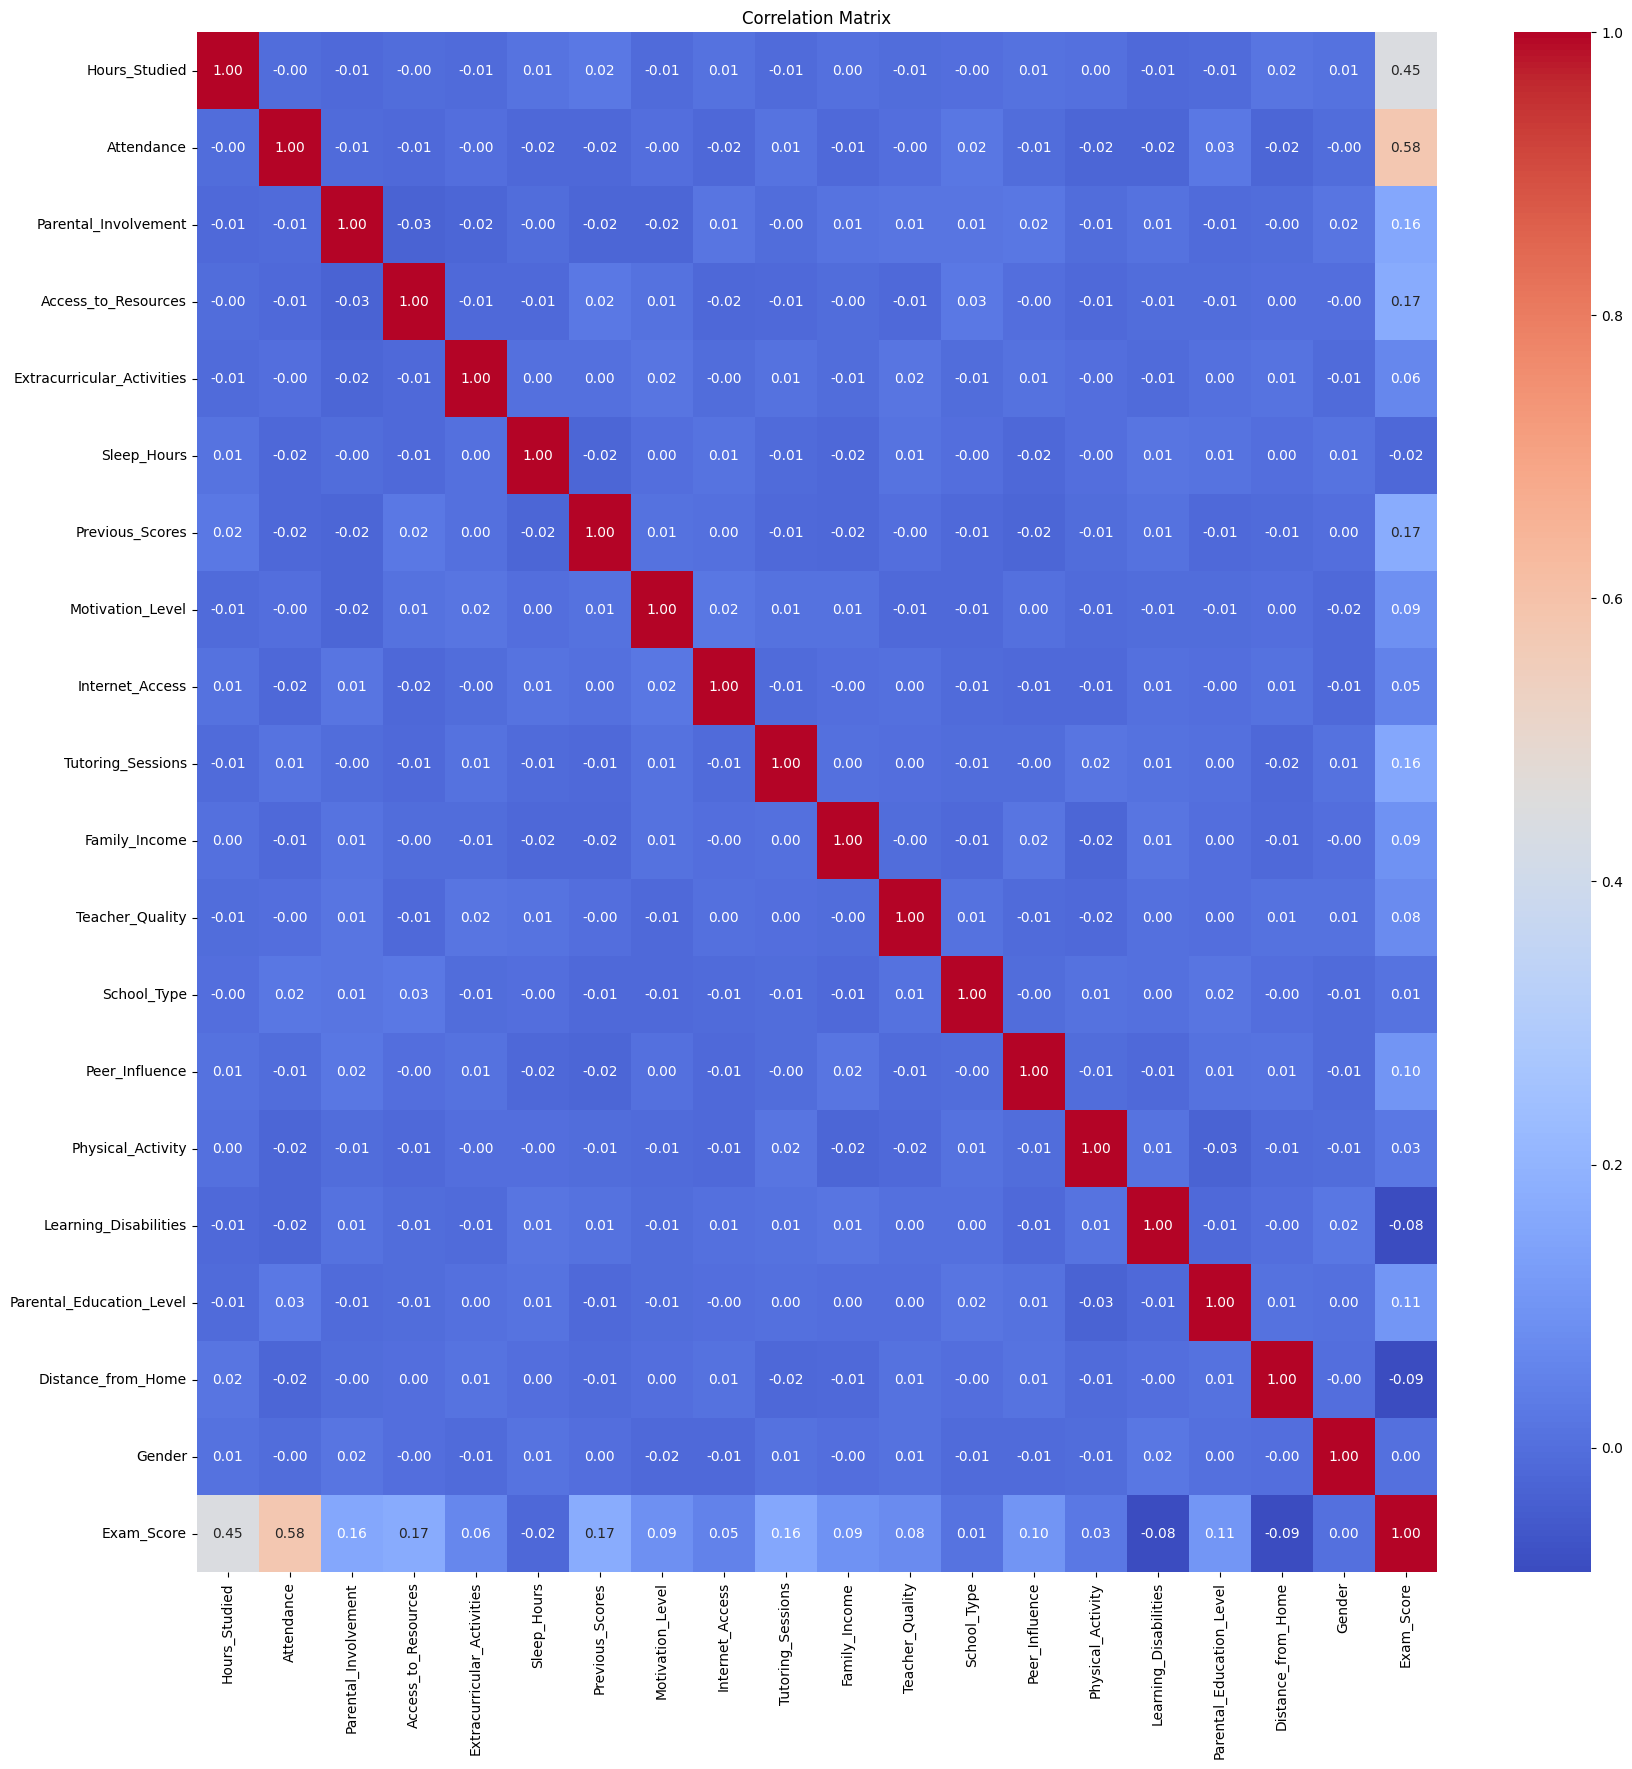

In [65]:
# Perform correlation analysis between Family Income, Teacher Quality, Extracurricular Activities, and Exam Score
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


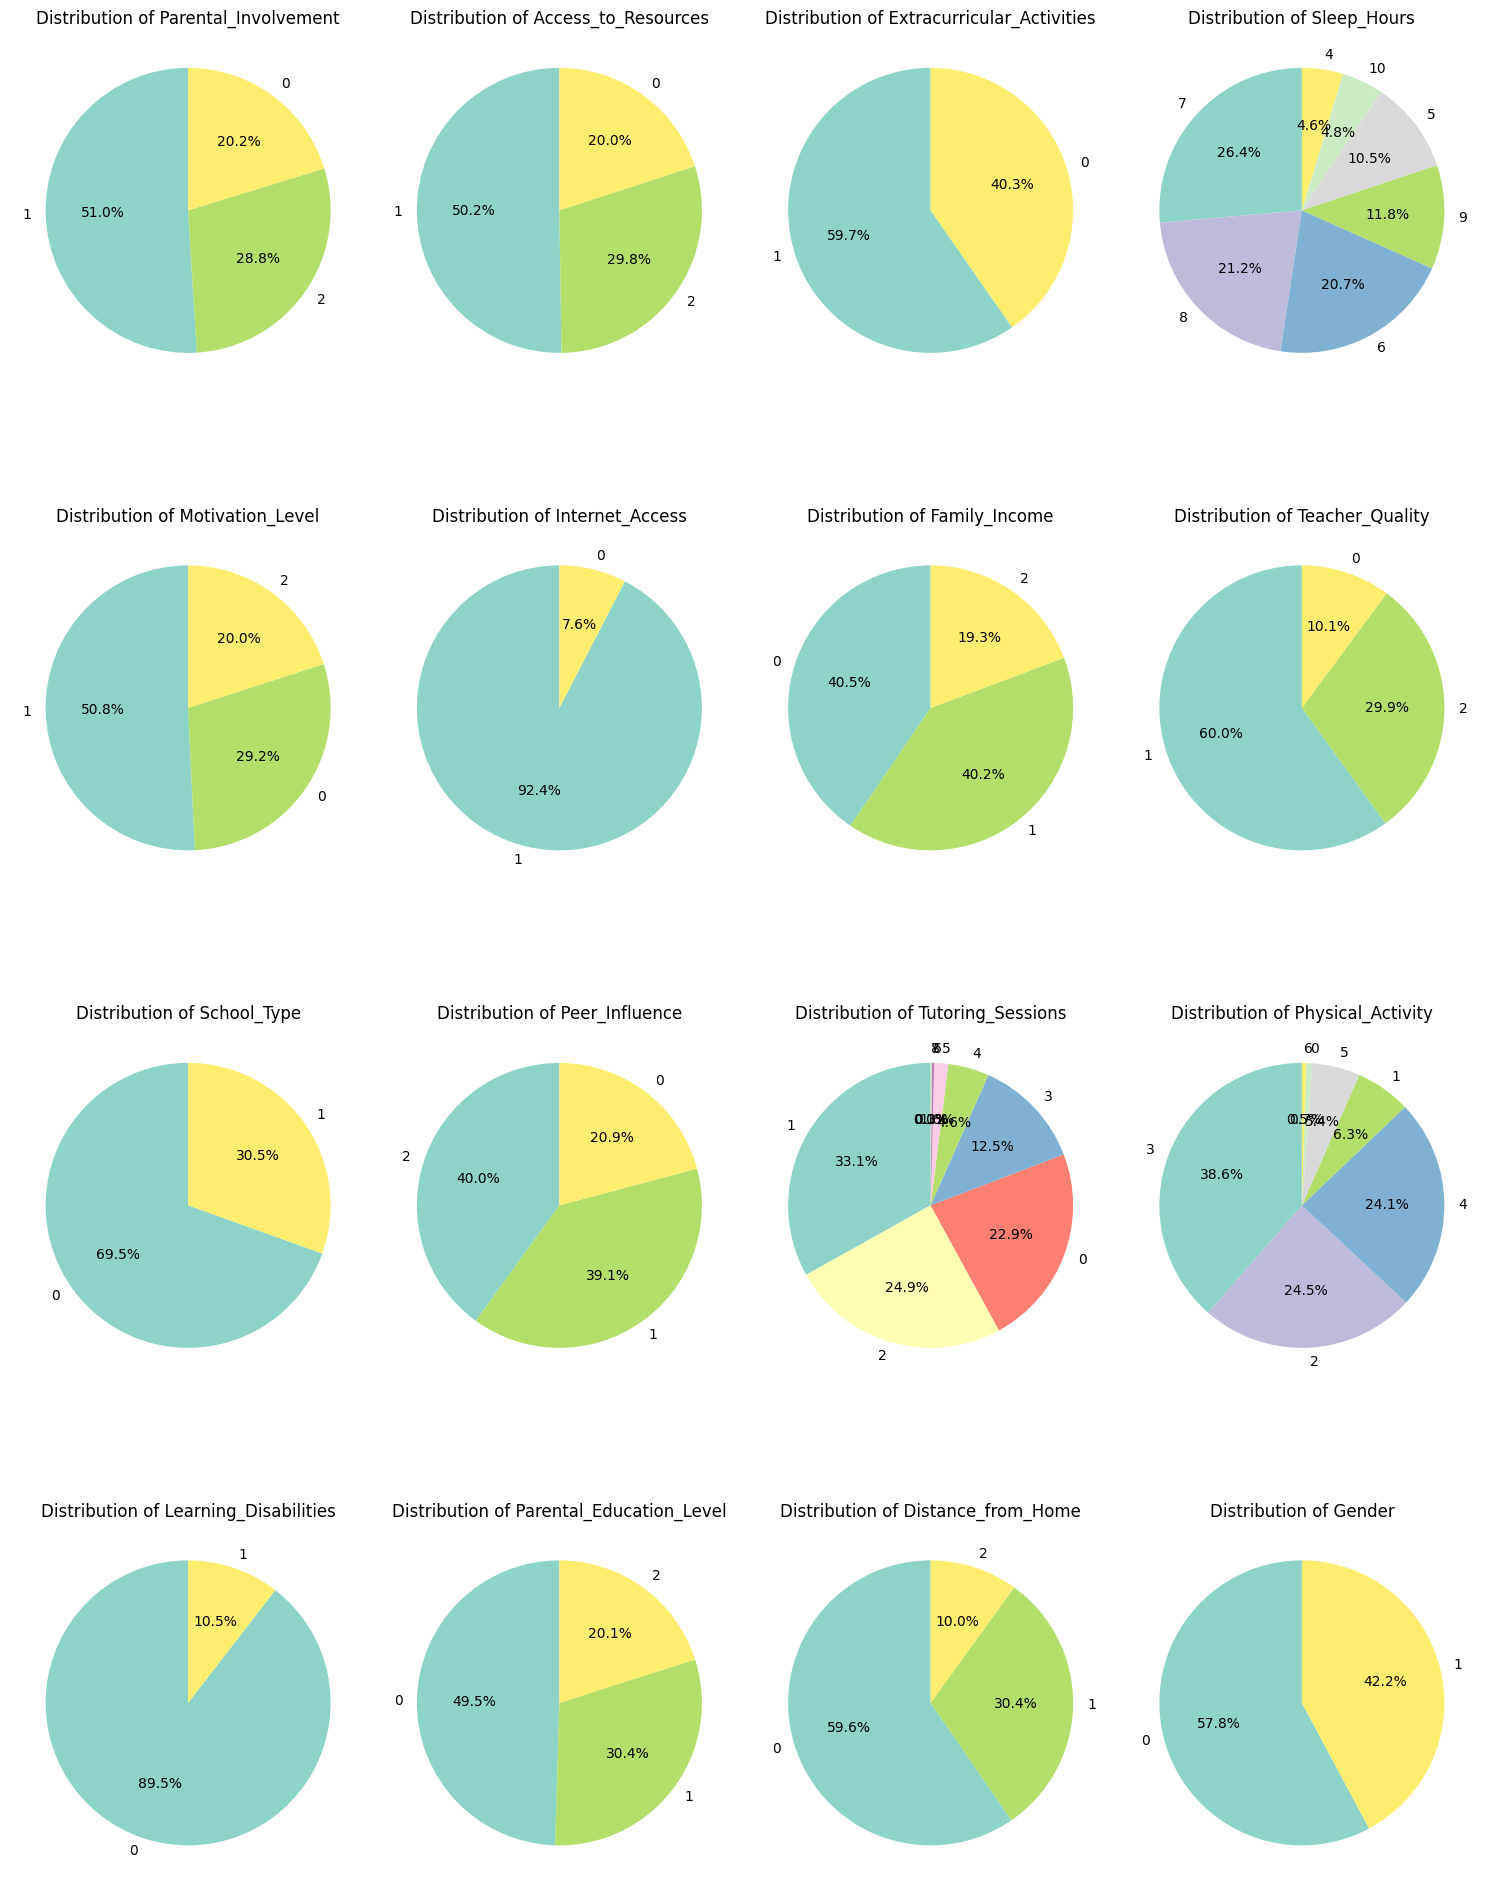

In [66]:
categorical_columns = df[['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Sleep_Hours','Motivation_Level',
                         'Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Tutoring_Sessions',
                          'Physical_Activity','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']].columns

# Calculate number of rows and columns dynamically
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of columns per row

# Plot using dynamic grid layout
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the grid size for your dataset
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

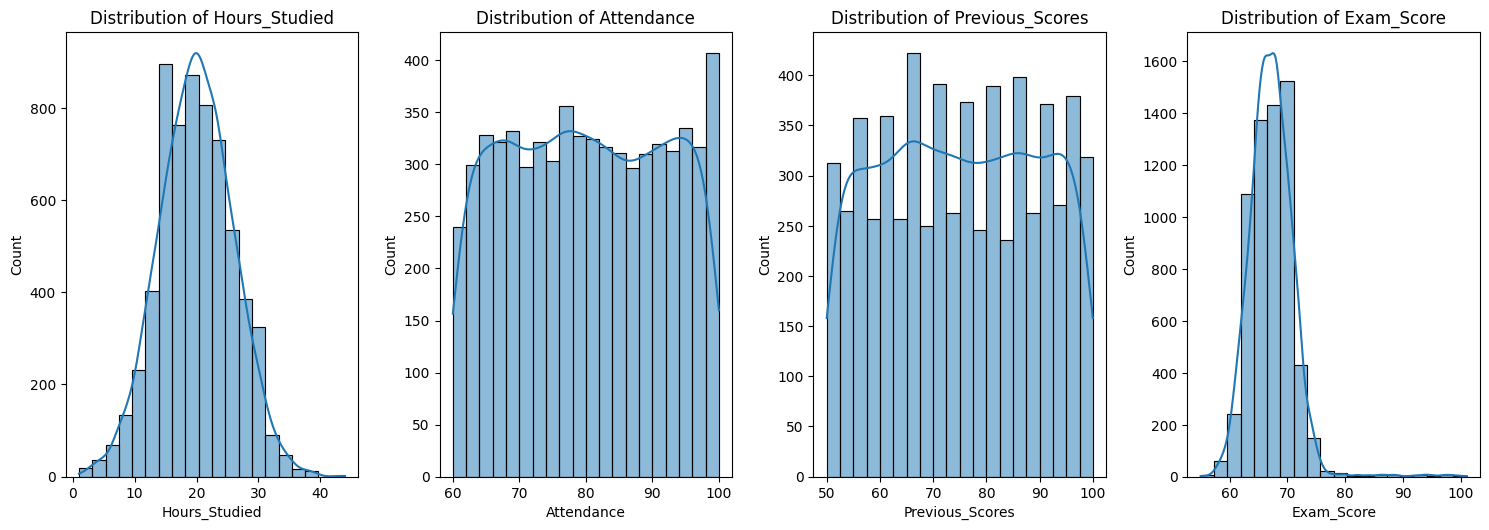

In [67]:
# List of columns you want to plot histograms for
count_columns = df[['Hours_Studied','Attendance','Previous_Scores','Exam_Score']].columns

# Calculate number of rows and columns dynamically
num_columns = len(count_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of columns per row

# Plot using dynamic grid layout
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(count_columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust based on the number of variables
    sns.histplot(df[column], kde=True, bins=20)  # Histogram with KDE curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## 4. Exploratory Data Analyst Questions

### 1. How does the combination of "Parental Involvement", "Attendance", and "Parental Education Level" affect students' "Exam Score"?

**Purpose**: Understand the interaction between parental involvement, attendance, and education level in influencing academic performance (exam scores).

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Parental Involvement" and "Parental Education Level" into numeric forms for analysis.
* **Multivariate Analysis**: Perform a correlation analysis to explore how these factors interact. Use scatter plots or 3D plots to visualize relationships.
* **Regression Analysis**: Use multiple linear regression or random forest regression to model the relationship between these features and the exam score.
* **Interaction Terms**: Introduce interaction terms in the regression to capture the combined effects of these features.

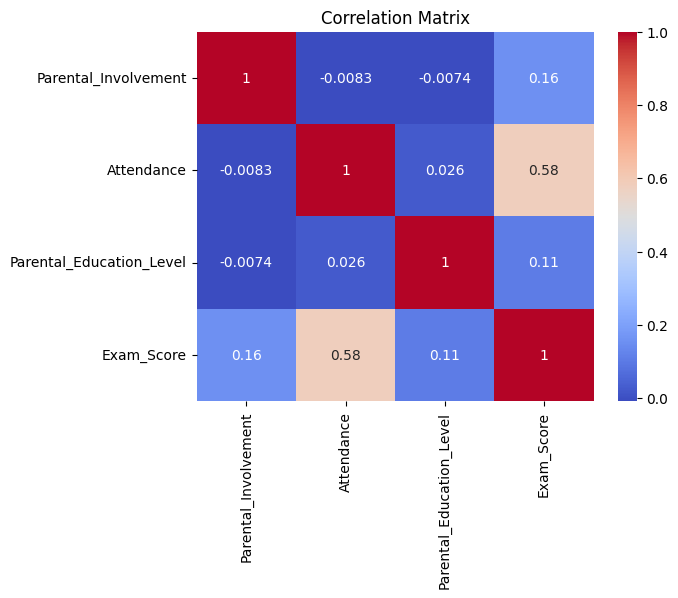

In [68]:
correlation = df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 'Exam_Score']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

The chart shows the correlation levels between variables:

- **Attendance and Exam_Score**: There is a relatively strong positive correlation (0.58), indicating that students with higher attendance rates tend to achieve higher exam scores.
- **Parental_Involvement and Exam_Score**: There is a weak positive correlation (0.16), suggesting that parental involvement has a small impact on exam scores.
- **Parental_Education_Level and Exam_Score**: There is a very weak positive correlation (0.11), indicating that the educational level of parents has minimal influence on exam scores.
- The remaining variable pairs have correlation coefficients close to 0, showing no significant relationship between them.

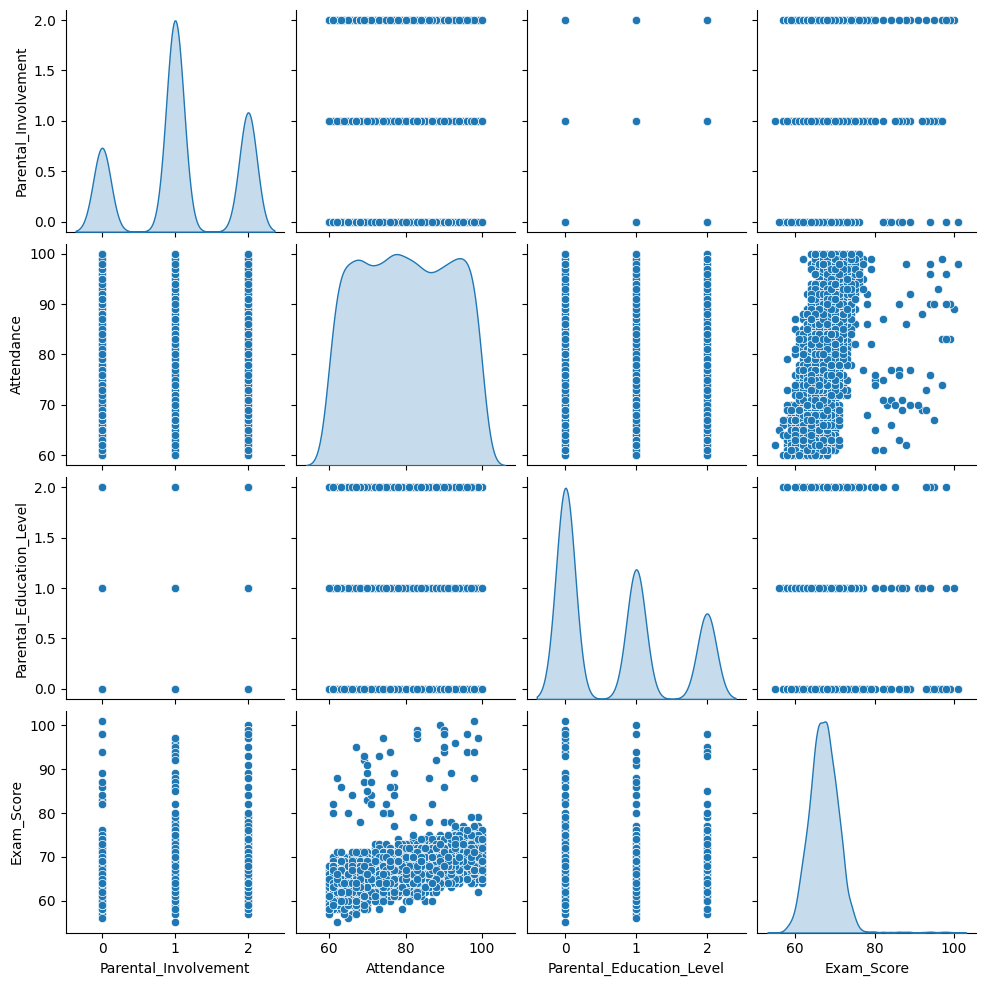

In [69]:
# Pair Plot
sns.pairplot(df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 'Exam_Score']], diag_kind='kde')
plt.show()

In [70]:
df['Attendance_x_Parental_Involvement'] = df['Attendance'] * df['Parental_Involvement']
df['Attendance_x_Parental_Education_Level'] = df['Attendance'] * df['Parental_Education_Level']
df['Parental_Involvement_x_Parental_Education_Level'] = df['Parental_Involvement'] * df['Parental_Education_Level']

X = df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 
        'Attendance_x_Parental_Involvement', 'Attendance_x_Parental_Education_Level',
        'Parental_Involvement_x_Parental_Education_Level']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression R²: 0.3979846068045173


The regression model explains 39.8% of the variance in exam scores, indicating that factors such as Attendance, Parental Involvement, and Parental Education Level have an impact but are not strong enough.

In [71]:
formula = "Exam_Score ~ Parental_Involvement + Attendance + Parental_Education_Level + " \
          "Attendance_x_Parental_Involvement + Attendance_x_Parental_Education_Level + " \
          "Parental_Involvement_x_Parental_Education_Level"
model = ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     627.0
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:05:28   Log-Likelihood:                -16273.
No. Observations:                6378   AIC:                         3.256e+04
Df Residuals:                    6371   BIC:                         3.261e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The regression results indicate that the model explains 37.1% of the variance in exam scores, with key factors including Attendance (the strongest impact, p < 0.001), Parental Involvement, and Parental Education Level (both having small but statistically significant impacts). However, the interaction variables are not statistically significant (p > 0.05) and could be removed to simplify the model. Additional factors should be included to improve the predictive accuracy of the model.

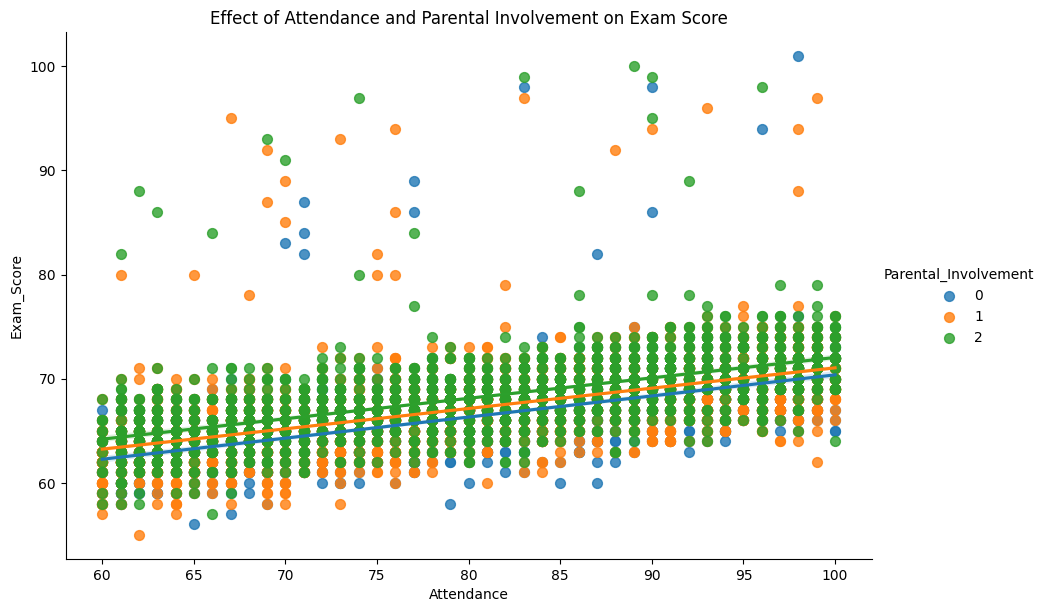

In [72]:
sns.lmplot(x='Attendance', y='Exam_Score', hue='Parental_Involvement', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Attendance and Parental Involvement on Exam Score')
plt.show()

Attendance has a positive relationship with exam scores, but this relationship depends on the level of parental involvement.
Parental involvement is a crucial factor that has a stronger impact on exam scores compared to attendance alone.

### 2. What impact does "Physical Activity" have on "Exam Score" when considering "Sleep Hours" and "Motivation Level" as moderators?

**Purpose**: Explore whether physical activity is an effective predictor of exam scores, especially when adjusted for sleep hours and motivation level, which could act as moderators.

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Physical Activity" and "Motivation Level" into numeric values.
* **Correlation Matrix**: Explore correlations between "Physical Activity", "Sleep Hours", "Motivation Level", and "Exam_Score".
* **Moderation Analysis**: Use a regression model with "Physical Activity", "Sleep Hours", and "Motivation Level" as predictors to see how they interact.
* **Visualization**: Create scatter plots or interaction plots to visualize the moderating effects.

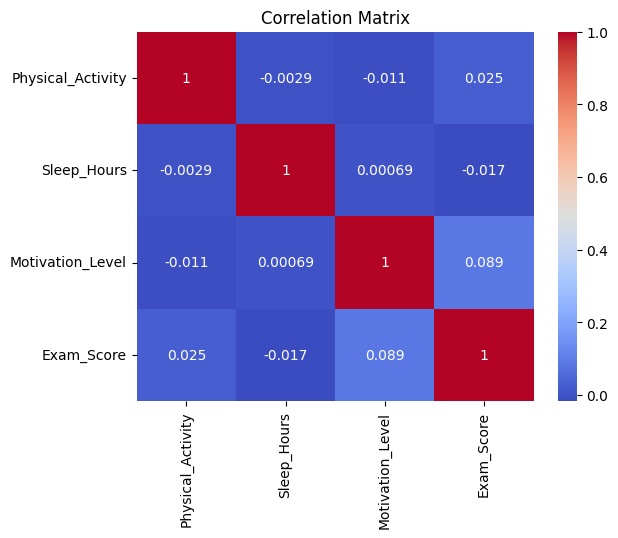

In [73]:
correlation = df[['Physical_Activity', 'Sleep_Hours', 'Motivation_Level', 'Exam_Score']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Observation:
- Physical_Activity and Exam_Score: A weak positive correlation (0.025). This suggests that physical activity has a very small effect on exam scores. 
- Sleep_Hours and Exam_Score: A weak negative correlation (-0.017), indicating that sleep duration has no clear impact on exam scores. 
- Motivation_Level and Exam_Score: A weak positive correlation (0.089). This suggests that motivation has a slight impact on exam results. 
- Other variable pairs: The correlation is close to 0, meaning there is no clear relationship between these variables.

In [74]:
df['PA_x_Sleep'] = df['Physical_Activity'] * df['Sleep_Hours']
df['PA_x_Motivation'] = df['Physical_Activity'] * df['Motivation_Level']

formula = "Exam_Score ~ Physical_Activity + Sleep_Hours + Motivation_Level + PA_x_Sleep + PA_x_Motivation"
model = ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.92e-11
Time:                        09:05:30   Log-Likelihood:                -17724.
No. Observations:                6378   AIC:                         3.546e+04
Df Residuals:                    6372   BIC:                         3.550e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.9776      0.76

Only Motivation_Level has a significant impact on exam scores (p-value = 0.002). The other factors, such as Physical_Activity, Sleep_Hours, and the interactions between these factors, have no clear impact on exam scores.

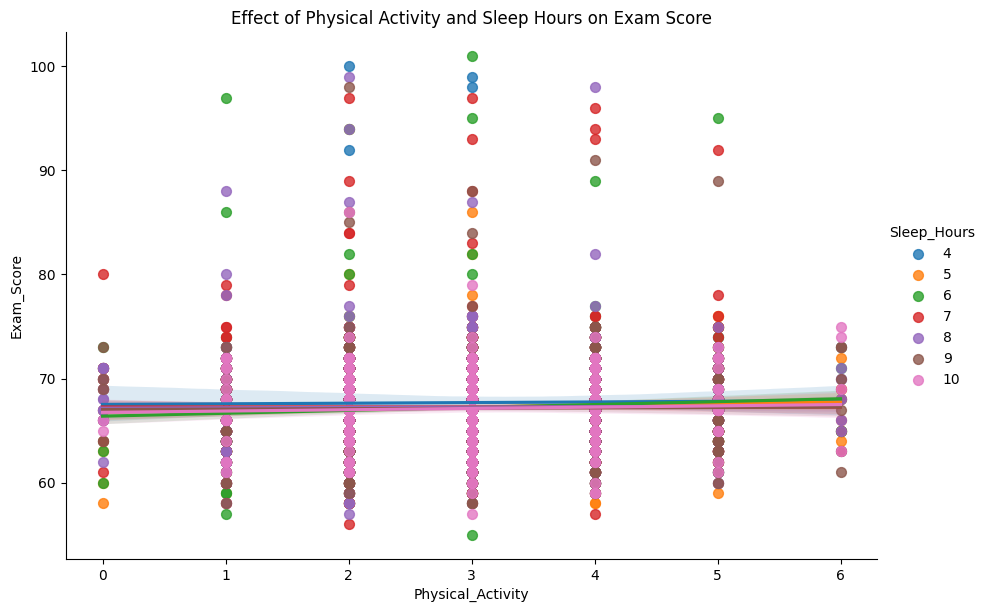

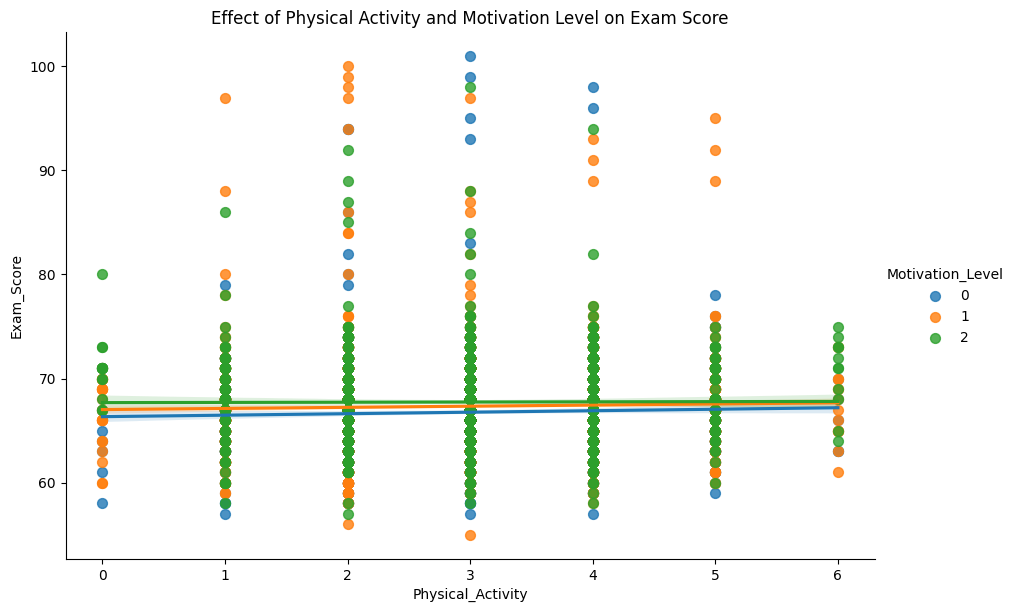

In [75]:
sns.lmplot(x='Physical_Activity', y='Exam_Score', hue='Sleep_Hours', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Physical Activity and Sleep Hours on Exam Score')
plt.show()

sns.lmplot(x='Physical_Activity', y='Exam_Score', hue='Motivation_Level', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Physical Activity and Motivation Level on Exam Score')
plt.show()

Based on the two charts:

- There is no clear relationship between "Physical Activity" and exam scores. Sleep Hours are evenly distributed but do not cause significant changes in exam scores.

- There is no noticeable difference in exam scores across the "Motivation Level" categories when combined with "Physical Activity" levels. Despite color distinctions between groups, the trend lines do not show significant variation, suggesting that "Physical Activity" and "Motivation Level" do not have a strong impact on exam scores.


### 3. How does sleep affect a student's performance, motivation level, attendance, and hours studied?


**Purpose**: Visualize how the hours of sleep can affect much to student's performance, motivation level, attendance, and hours studied

**Steps**:
* **Visualization**: Using multiple of plots to describe how sleep hours affect each features

#### Box Plot for Sleep Hours and Exam Score

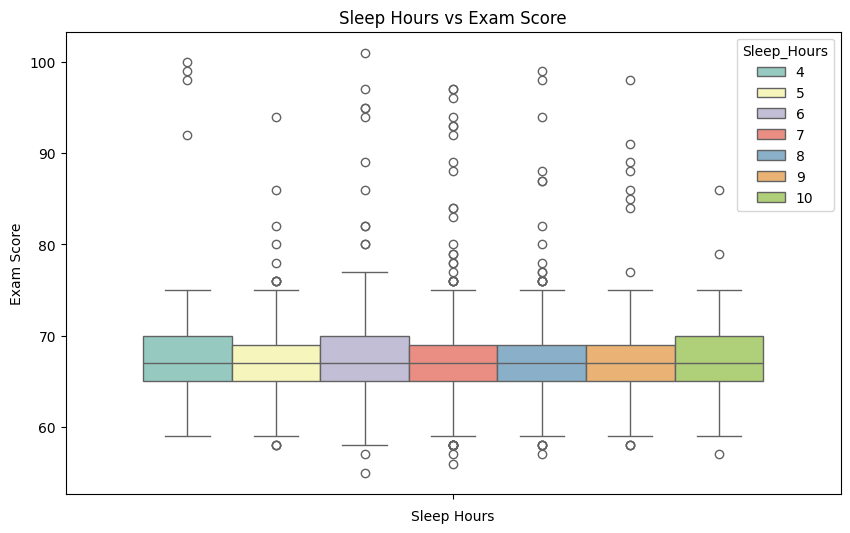

In [76]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, hue='Sleep_Hours', y='Exam_Score', palette='Set3')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

Look at the box plot, we can see that at the hour sleep of 6, the max score of the box seems to be more higher than other box. This can be analyze that with enough sleep, not too much but not too less, the score we achive could be higher. As the 5th, 7th, 8th and 9th hours sleep's boxes, we can see that the IQR range is narrow, meaning the performance of student is not different much to mean, and it really consistent.

As about the outliers, we see that in the 6th, 7th, and 8th hours have more outliers than other boxes,it can tell that these hours are having more than just hours factor that are contributing to students' performance. 

#### Bar Plot for Sleep Hours and Motivation Level

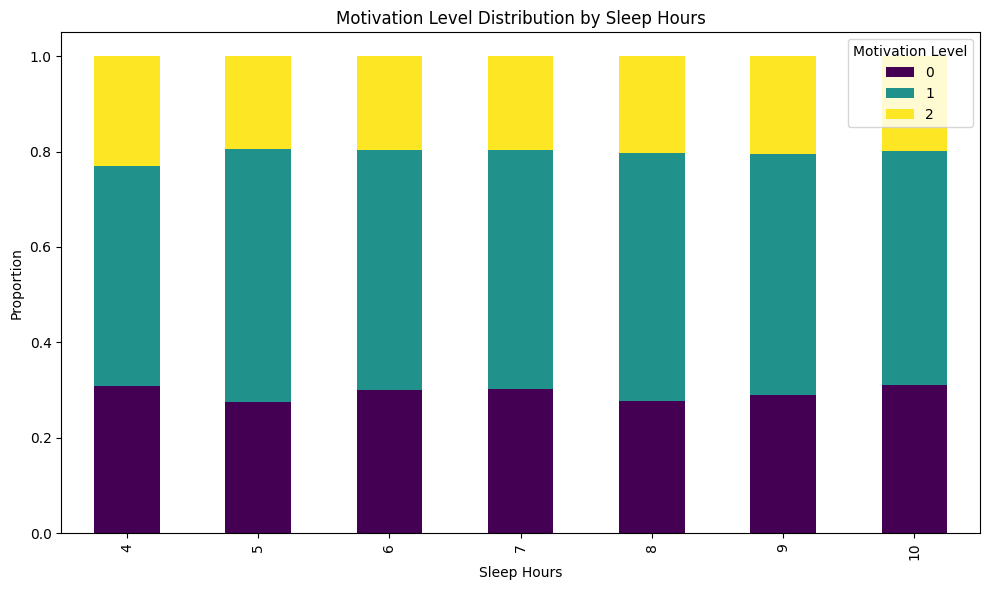

In [77]:
motivation_crosstab = pd.crosstab(df['Sleep_Hours'], df['Motivation_Level'], normalize='index')

motivation_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Motivation Level Distribution by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Proportion')
plt.legend(title='Motivation Level')
plt.tight_layout()
plt.show()

Look at this plot, we see that, to be suprise, the most highest motivation level is the 4th hours. This plot alone can't explain this situation :v .

#### Box plots for Sleep Hours and Hours Studied

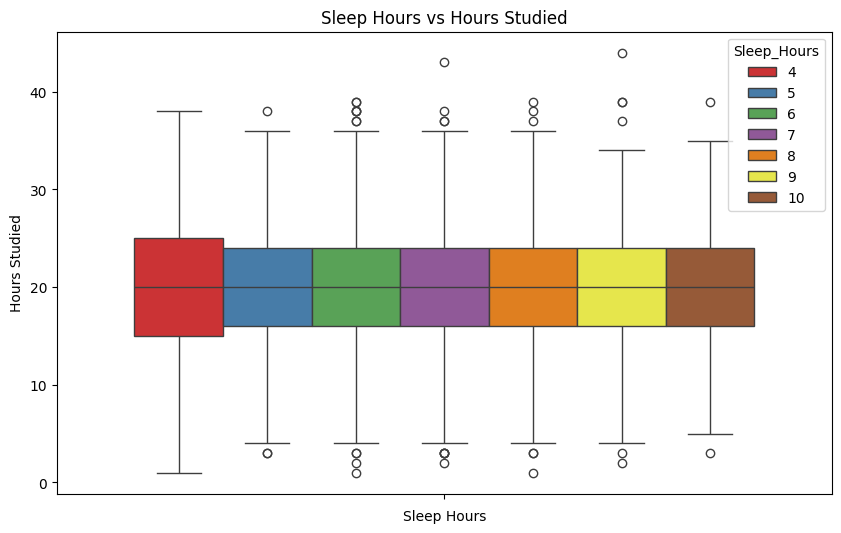

In [78]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, hue='Sleep_Hours', y='Hours_Studied', palette='Set1')
plt.title('Sleep Hours vs Hours Studied')
plt.xlabel('Sleep Hours')
plt.ylabel('Hours Studied')
plt.show()

With this box plot between Sleep Hours, we see that as the trade for sleep hours, the **4-hours sleep** tend to have more hours studied than other hours sleeps, as their box and whiskers are more wider. As the more the sleep hours, the narrow the box whiskers get.

#### Box plots showing the relationship between Sleep Hours and Attendance

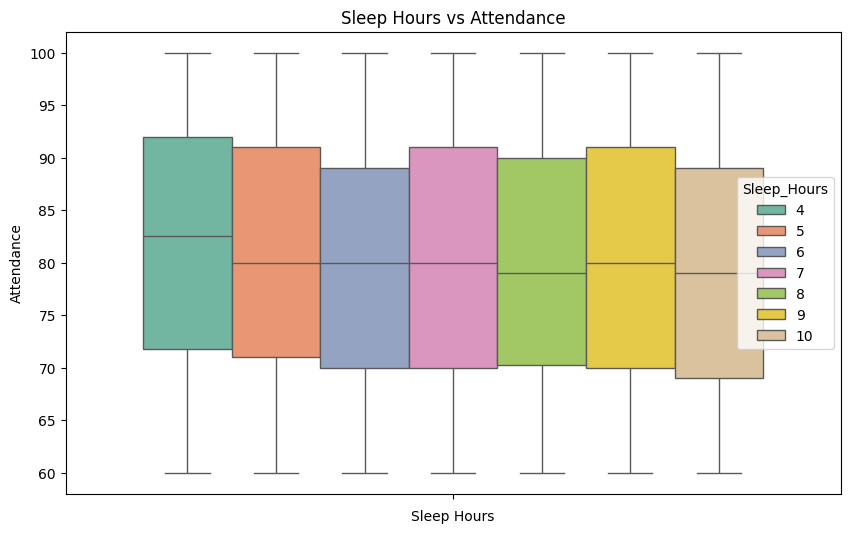

In [79]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, hue='Sleep_Hours', y='Attendance', palette='Set2')
plt.title('Sleep Hours vs Attendance')
plt.xlabel('Sleep Hours')
plt.ylabel('Attendance')
plt.show()

Despite the lower sleep hours, the 4-hours sleep tend to have more attendance ohter sleep hours. And the more the sleep hours, the box tend to go lower, meaning the the attendance is decreased.

#### Conclusion

From these visualizations, we made two key observations:
- Students who sleep **4 hours per night**, the lowest sleep category, had the highest class attendance on average. This result is unexpected, as one would assume that students with a low amount of sleep would be less likely to attend class.
- Despite their higher attendance, these same students had **the lowest proportion** of **“high”** motivation levels. Instead, they were distributed within the **“low”** and **“medium”** motivation categories, highlighting a discrepancy between their attendance and perceived motivational state.

### 4. Can we predict "Exam Score" using a combination of "Hours Studied", "Parental Involvement", and "School Type"? What features are most influential?

**Purpose**: Tests if we can predict exam scores based on these features and identifies the most influential ones.

**Steps**:
* **Data Preprocessing**: Encode categorical variables ("Parental Involvement" and "School Type") as numeric values, split dataset
* **Feature Correlation**: Use techniques like correlation analysis, mutual information, or feature importance (from tree-based models like random forests) to identify relevant features.
* **Modeling**: Train a regression model (e.g., Random Forest, Gradient Boosting) to predict exam scores.
* **Model Evaluation**: Evaluate the model's performance using metrics like RMSE or R².

After we have preprocess and mapping all the data above, we would like to explore whether the feature **"Hours Studied"**, **"Parental Involvement"** or **"School Type"** did afftect the **"Exam Score"**. In this question, we will explore that using Machine Learning model.

#### Data Preprocessing

First, we will get those feature above and split the dataset into train and test set for training.

In [80]:
Q_3 = df[['Hours_Studied', 'Parental_Involvement', 'School_Type', 'Exam_Score']].copy()

# Select relevant features and target for prediction
X = Q_3[['Hours_Studied', 'Parental_Involvement', 'School_Type']]  # Independent variables
y = Q_3['Exam_Score']  # Dependent variable

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature Correlation

After that, we will visualize the feature to see their correlation using Heatmap Plot.

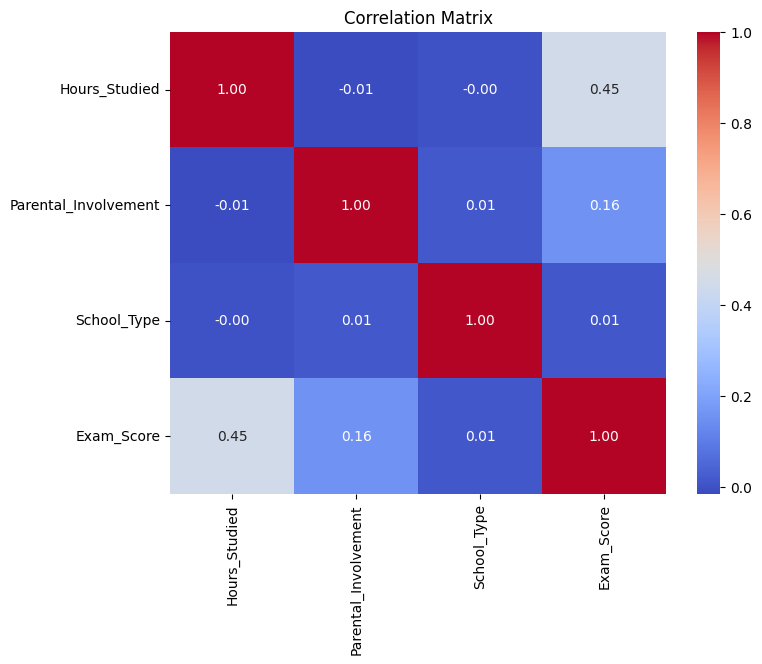

In [81]:
# Perform correlation analysis to examine relationships between features and target variable
correlation_matrix = Q_3[['Hours_Studied', 'Parental_Involvement', 'School_Type', 'Exam_Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

We can see that in this Correlation Matrix, not much feature in correlated with each other. Those with highest correlation are "Hour Studied" and "Exam Score" (**0.45**), which was really realistic in real life because without a doubt the more you learned, the greater your score will in most circumstance. But how much it affect with the prediction. That what we'll do in next section.

#### RandomForest Modeling

We will using RandomForesetRegressor for getting Feature Importance in these feature in percentage using those train and test dataset above.

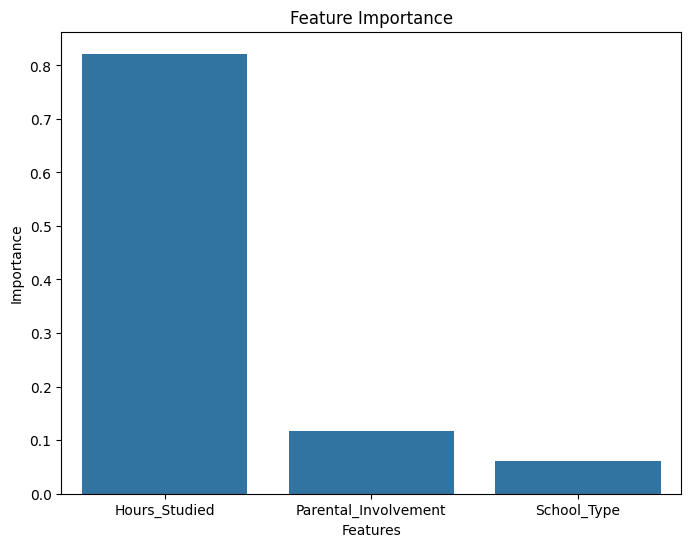

In [82]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame(model.feature_importances_, X.columns, columns=["Importance"])

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


We can see clearly that "Hours Studied" has a lot more more percentage of importance than "Parental Involvement" and "School Type". In real life, school type doesn't affect with your grade despite sometimes the more you level up your school grade, the harder you will get good score, but who are good will always good at anywhere they learn. About Parental Involvement, if we look about the past, the parental involvement will kinda affect a lot about your school grades because most of the time, without high technologies, your parents' influence did affect a lot you school grade. But now, with high technologies, things kinda different now.

#### Evaluation

We evaluate model using $RMSE$ and $R^2$ score

In [83]:
# Get predictions for the test set
y_pred = model.predict(X_test)

# Calculate R² score and RMSE for model evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output R² and RMSE scores
r2, rmse

d:\Others\LanguagePackets\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.2113938595935353, np.float64(3.3502530278579794))

The $R^2$ score is 0.2136681023448277 and the $RMSE$ score is 3.3984059937399733 tells that the model is not kinda work with these feature. Maybe it based on the feature importance that we have discovered above that those **"Parental Involvement"** and **"School Type"** feature does not correlated well with the score. That's why it the evaluation models is not really good. 

Based on these exploratory, we conclude that these feature can not be combined to predict the exam score, except maybe "Hour Studied" alone still can make it though. And of course, **"Hour Studied"** is the most influential feature to predict **"Exam Score"** in these features.

**Steps**:
* **Data Preprocessing**: Convert categorical variables ("Internet Access" and "Motivation Level") into numeric variables.
* **ANOVA/t-tests**: Conduct an ANOVA or pairwise t-tests to compare exam scores across different groups of internet access and motivation level.
* **Regression Analysis**: Perform post-hoc tests to examine pairwise differences between groups if neccessary
* **Visualization**: Create boxplots or violin plots to visualize score distributions across groups.

### 5. How does the presence of extracurricular activities, peer influence, and sleep hours correlate with exam performance? How does peer influence interact with student extracurricular engagement?

**Purpose**: Help understand the role of extracurricular activities and peer influence in shaping student success.

**Steps**:
* **Groupby Analysis**: Group data by 'Extracurricular_Activities' and 'Peer_Influence' to calculate mean exam scores.
* **Visualization**:  Use bar plots or heatmaps to visualize the relationship between these variables and performance.
* **Statistical Test**: Conduct a chi-square test to evaluate if the relationship between extracurricular activities and peer influence is statistically significant with respect to exam performance.

#### Correlation Analysis

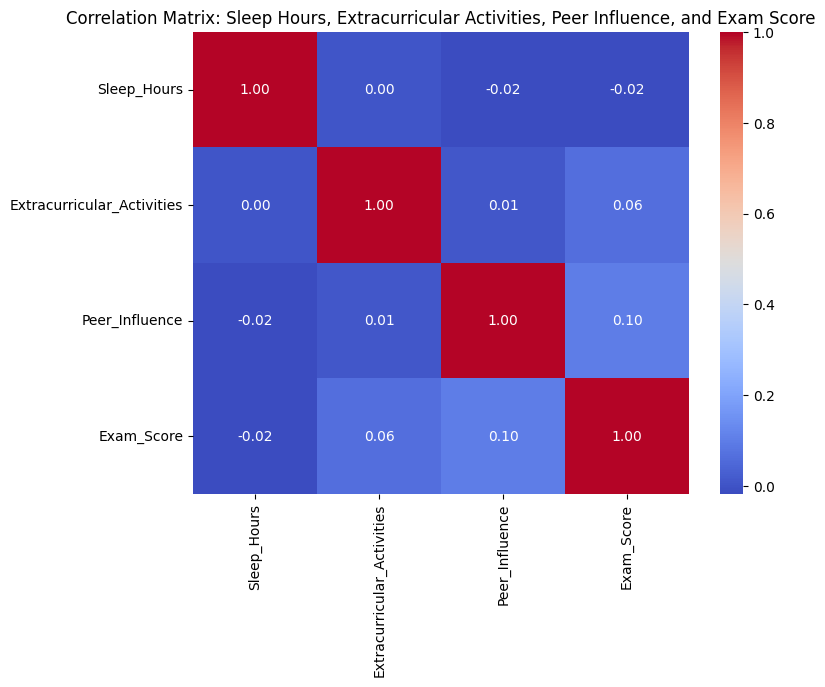

In [84]:
# Calculate correlation matrix for relevant features
correlation_matrix_5 = df[['Sleep_Hours', 'Extracurricular_Activities', 'Peer_Influence', 'Exam_Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Sleep Hours, Extracurricular Activities, Peer Influence, and Exam Score')
plt.show()


#### Groupby Analysis

We will now proceed to do Groupby Analysis with **Extracurricular Activities** and **Peer Influence** to see how these features interact with each other. First, we will groupby them and use boxplot and heatmap to visualize it.

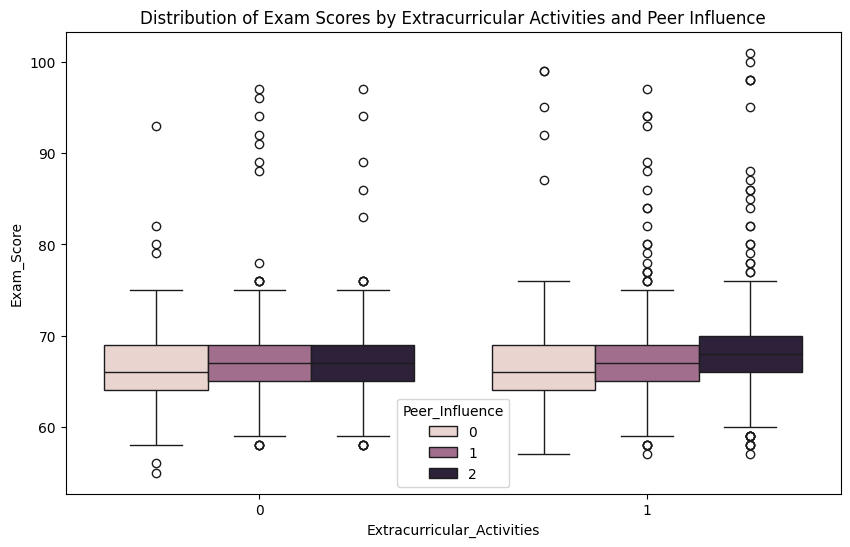

In [85]:
# Group by extracurricular activities and peer influence, and calculate the average exam score
grouped = df.groupby(['Extracurricular_Activities', 'Peer_Influence'])['Exam_Score'].mean().reset_index()

# Plot the distribution of exam scores by extracurricular activities and peer influence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', hue='Peer_Influence', data=df)
plt.title('Distribution of Exam Scores by Extracurricular Activities and Peer Influence')
plt.show()


With this boxplot, we will analyze within these 3 features of box:
* **Box**: We could see that with the label 0(No) and 1(Yes) of Extracurricular Activities, the box, means the 50% percentile of the Exam Score have no much difference, except that the label 1 is slightly higher than label 0 when compare with label 2(Positive). Talking about Peer Influence. We see that with the label 0(Negative), we see that the exam score is lower than other 2 labels, means that the negative emotion can really affect the Exam Score.
* **Outliers**: Both groups show outliers, but students involved in extracurricular activities tend to have fewer extreme scores (outliers), suggesting their performance is generally more consistent. Non-extracurricular students with negative peer influence have more extreme outliers, indicating there are a few students performing significantly worse.

Without any doubt, we see that the extracurricular activities and peer influence, which does realte to the emotion of the student, does affect the exam score with their respective attitude, with the positive really push it up and vice versa. The heatmap below is more highlight for this conclusion.

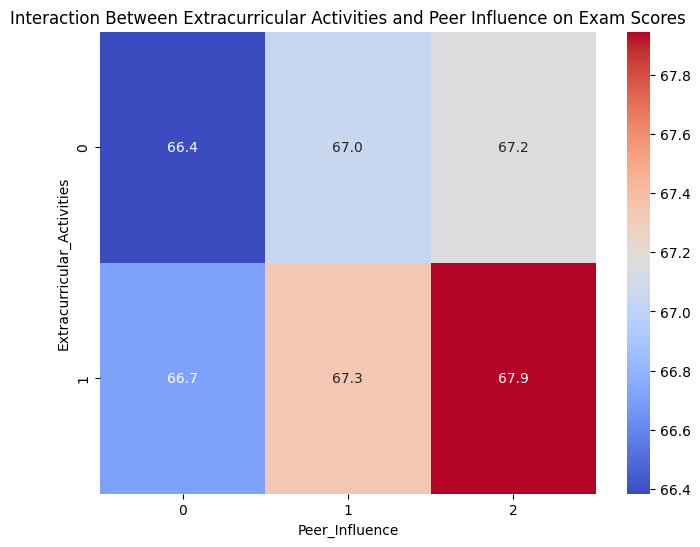

In [86]:
# Create a pivot table for heatmap visualization
pivot_data = df.pivot_table(values='Exam_Score', 
                                    index='Extracurricular_Activities', 
                                    columns='Peer_Influence', 
                                    aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Interaction Between Extracurricular Activities and Peer Influence on Exam Scores')
plt.show()


You could see that the value of **Exam Score** rise as the **Extracurricular Activities** and **Peer Influence** rise in positive. The max value of the Exam Score is the combination of attending the activities and get postive influence by other peers. On the other side, the minimum value of the Exam Score is the combination of not attending the extra activities and get negative influence by peers.

### 6. What are the effects of "Gender" and "Peer Influence" on the academic performance of students, particularly on "Exam Score"?

**Purpose**: Explores whether gender and peer influence significantly affect students' exam scores, considering possible interactions between these factors.

**Steps**:
* **Data Preprocessing**: Convert categorical variables into numeric values.
* **Interaction Analysis**: Investigate potential interactions between "Gender" and "Peer Influence" using interaction terms in a regression model.
* **ANOVA/Regression**: Use ANOVA or a regression model to assess the significance of these factors.
* **Visualization**: Create interaction plots to visualize the effects of "Gender" and "Peer Influence" on "Exam_Score".

Coefficients: [-1.93889389e+12  7.10710209e+12  9.50157004e+11 -7.10710209e+12
  9.88736889e+11 -9.71679688e-02 -1.06891632e-01]
Intercept: 66.63275760795376


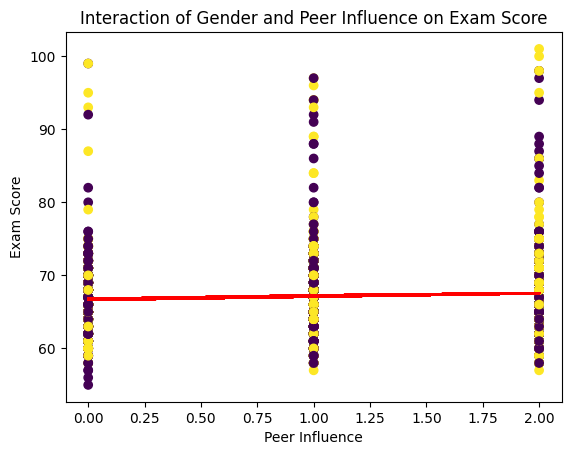

In [87]:
# Create a copy of the dataframe
GP_df = df.copy()

# Create the interaction term using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_transformed = poly.fit_transform(GP_df[['Gender', 'Peer_Influence']])

# Include the original features (without interaction)
X_transformed = np.hstack((GP_df[['Gender', 'Peer_Influence']], X_transformed))

# Perform linear regression
model = LinearRegression().fit(X_transformed, GP_df['Exam_Score'])

# Print some key coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Prediction (optional)
predicted_scores = model.predict(X_transformed)

# Visualization
plt.scatter(GP_df['Peer_Influence'], GP_df['Exam_Score'], c=GP_df['Gender'])
plt.plot(GP_df['Peer_Influence'], predicted_scores, color='red')
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.title('Interaction of Gender and Peer Influence on Exam Score')
plt.show()

Observation:
- `Peer_Influence` Effect:
    - The regression line is almost flat, indicating that Peer_Influence does not have a strong effect on Exam_Score.
    - This means that regardless of the level of peer influence, the average exam score does not change significantly.

- `Gender` Effect:
    - The distribution of data points (purple and yellow) shows a difference between males and females. However, the regression line is not clearly separated by gender, indicating that gender may not be the main determinant of exam scores in this model.

- `Gender` and `Peer_Influence` Interaction:
    - The model includes an interaction term between `Gender` and `Peer_Influence`.
    - The interaction term is used to test whether peer influence has a different effect on males and females. However, the graph shows that the effect of this interaction term is very small, as the regression line does not vary much by gender.

In [88]:
# Calculate Pearson correlation coefficient between Gender, Peer_Influence and Exam_Score
correlation_gender_exam = GP_df['Gender'].corr(GP_df['Exam_Score'])
correlation_peer_exam = GP_df['Peer_Influence'].corr(GP_df['Exam_Score'])

print(f"Correlation between Gender and Exam_Score: {correlation_gender_exam:.2f}")
print(f"Correlation between Peer_Influence and Exam_Score: {correlation_peer_exam:.2f}")

Correlation between Gender and Exam_Score: 0.00
Correlation between Peer_Influence and Exam_Score: 0.10


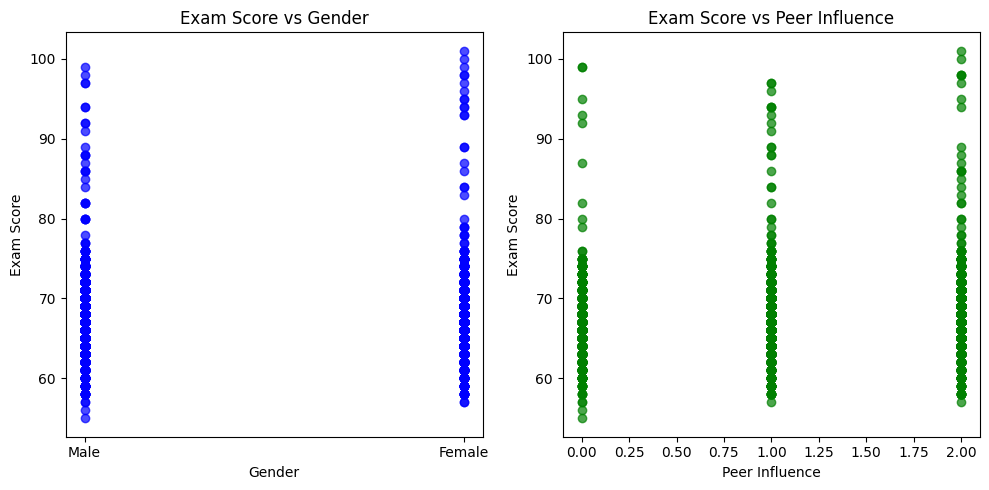

In [89]:
# Chart 1: Exam_Score with Gender
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(GP_df['Gender'], GP_df['Exam_Score'], color='blue', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.title('Exam Score vs Gender')
plt.xticks([0, 1], ['Male', 'Female'])

# Chart 2: Exam_Score vs Peer_Influence
plt.subplot(1, 2, 2)
plt.scatter(GP_df['Peer_Influence'], GP_df['Exam_Score'], color='green', alpha=0.7)
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.title('Exam Score vs Peer Influence')

plt.tight_layout()
plt.show()

### 7. How do students' "Distance from Home" and "Sleep Hours" correlate with their academic performance, and what patterns emerge across different "School Types"?

**Purpose**: This question explores how distance from home and sleep hours contribute to exam scores, with consideration for varying patterns across school types (public or private).

**Steps**:
* **Data Preprocessing**: Handle categorical variables like "Distance from Home" and "School Type".
* **Grouping**: Group the data by "School Type" and analyze the correlation between "Distance from Home", "Sleep Hours", and "Exam Score" within each group.
* **Visualizations**: Use scatter plots or grouped bar charts to visualize the correlation and potential patterns across school types.

School Type 0 - Correlation (Distance vs Exam): -0.07
School Type 0 - Correlation (Sleep vs Exam): -0.03
School Type 1 - Correlation (Distance vs Exam): -0.14
School Type 1 - Correlation (Sleep vs Exam): 0.02


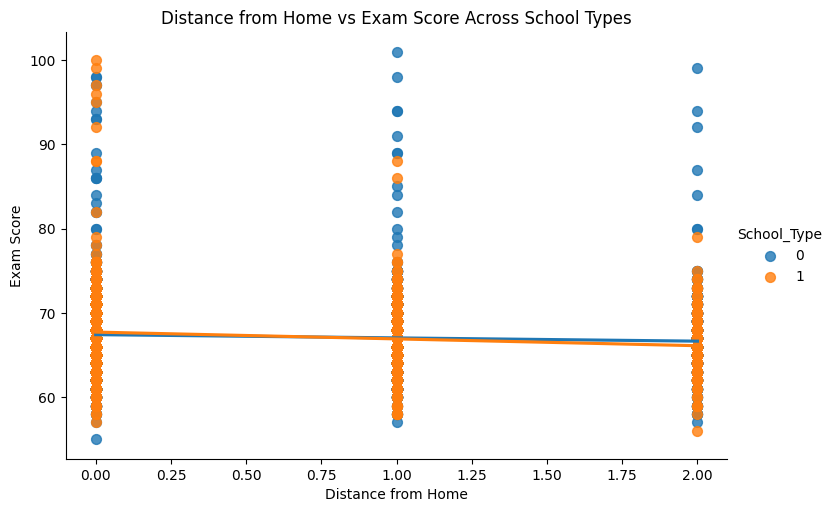

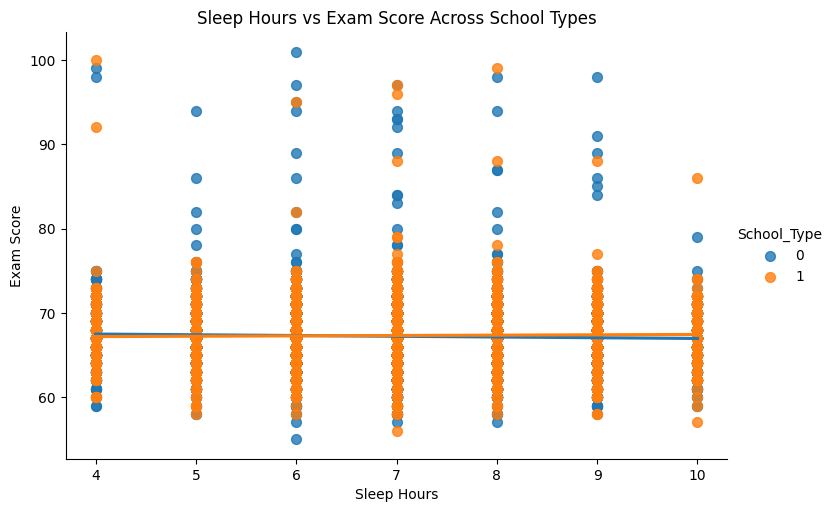

In [90]:
# Group by School_Type
school_groups = df.groupby('School_Type')

# Calculate correlations within each group
for school_type, group in school_groups:
    corr_distance = group['Distance_from_Home'].corr(group['Exam_Score'])
    corr_sleep = group['Sleep_Hours'].corr(group['Exam_Score'])
    print(f"School Type {school_type} - Correlation (Distance vs Exam): {corr_distance:.2f}")
    print(f"School Type {school_type} - Correlation (Sleep vs Exam): {corr_sleep:.2f}")

# Visualization: Scatter plots for each school type
sns.lmplot(
    x="Distance_from_Home",
    y="Exam_Score",
    hue="School_Type",
    data=df,
    aspect=1.5,
    scatter_kws={"s": 50},
    ci=None
)
plt.title("Distance from Home vs Exam Score Across School Types")
plt.xlabel("Distance from Home")
plt.ylabel("Exam Score")
plt.show()

sns.lmplot(
    x="Sleep_Hours",
    y="Exam_Score",
    hue="School_Type",
    data=df,
    aspect=1.5,
    scatter_kws={"s": 50},
    ci=None
)
plt.title("Sleep Hours vs Exam Score Across School Types")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

**Graph 1: Distance from Home and Exam Score**
- Data meaning:
    - Horizontal axis: `Distance_from_Home` (distance from home to school).
    - Vertical axis: `Exam_Score` (exam score).
    - Colors: Type 0 schools (blue) and Type 1 schools (orange).
- Comments:
    - Low correlation: The values ​​of `Distance_from_Home` do not affect `Exam_Score` much, as the scores do not change significantly when the distance from home to school changes.
    - The regression line is almost flat for both types of schools:
        - Type 0 schools: Correlation coefficient is -0.07 → Very weak relationship, almost non-existent.
        - Type 1 schools: Correlation coefficient is -0.14 → Weak relationship, indicating that longer distances may have a very small, but insignificant, impact on exam scores.

**Graph 2: Sleep Hours and Exam Score**
- Data meaning:
    - Horizontal axis: `Sleep_Hours` (number of hours of sleep).
    - Vertical axis: `Exam_Score` (number of scores).
    - Colors: Type 0 schools (blue) and Type 1 schools (orange).
- Comments:
    - Weak correlation: The regression line is almost flat for both types of schools.
        - Type 0 schools: Correlation coefficient is -0.03 → There is no significant relationship between sleep hours and exam scores.
        - Type 1 schools: Correlation coefficient is 0.02 → The relationship is almost non-existent, as the difference in sleep hours does not affect the scores much.

**Result meaning**
- Distance from home to school (`Distance_from_Home`):
    - The relationship between distance from home to school and exam scores is very weak or non-existent.
    - This may be due to students adapting to the distance from home to school (such as taking the bus or moving closer).
- Sleep hours (`Sleep_Hours`):
    - The relationship between sleep hours and test scores is also very weak, indicating that sleep hours (within the normal range) are not a determinant of test scores.
- Differences between school types (`School_Type`):
    - Although the graphs are classified by school types 0 and 1, differences in school types do not show a clear effect on the relationship between variables (distance, sleep hours) and test scores.

### 8. Can we predict the likelihood of high exam scores (≥ 70) using family background (income, parental education, parental involvement) and student behavior (attendance, extracurricular activities, motivation level)?

**Purpose**: Build a predictive model to forecast students' likelihood of achieving high exam scores based on socio-economic and behavioral factors.

**Steps**:
* **Feature Engineering**: Convert socio-economic and behavioral variables into numerical features, and define the target variable as Exam_Score ≥ 80 (binary classification).
* **Modeling**: Use classification models (e.g., Logistic Regression, XGBoost) to predict whether a student will achieve high performance.
* **Evaluation**: Assess model performance using metrics such as accuracy, precision, recall, and ROC-AUC.
* **Visualization**: Visualize decision boundaries or feature importance.
* **Statistical Tests**: Test the significance of the model's features using hypothesis testing or regression analysis.

#### Data Preparing

We split the data set into train and test set to train for the model, as well as create the label for the **Exam Score** for the threshold (≥ 70) as the threshold with 80 is kinda low for the model to learn the data.

In [91]:
# Encoding categorical variables to numerical values using LabelEncoder or predefined mappings
Q_9 = df.copy()

# Create the target variable High_Score: 1 if Exam_Score >= 80, else 0
Q_9['High_Score'] = Q_9['Exam_Score'].apply(lambda x: 1 if x >= 70 else 0)

# Selecting the features for the model
features = ['Family_Income', 'Parental_Education_Level', 'Parental_Involvement', 'Attendance', 
            'Extracurricular_Activities', 'Motivation_Level']
X = Q_9[features]
y = Q_9['High_Score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the first few rows of the features and target variable
Q_9[['High_Score'] + features].head()


,High_Score,Family_Income,Parental_Education_Level,Parental_Involvement,Attendance,Extracurricular_Activities,Motivation_Level
0,0,0,0,0,84,0,0
1,0,1,1,0,64,0,0
2,1,1,2,1,98,1,1
3,1,1,0,0,89,1,1
4,1,1,1,1,92,1,1


#### Model Prediction

For the classification label (0 and 1), we will using the famous binary classification regression, Logisitic Regression to predict the **High Score** label.

In [92]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Output the evaluation metrics
print("Accuracy:" ,accuracy)
print("F1 Score:" ,f1)
print("ROC_AUC:" ,roc_auc)

Accuracy: 0.804858934169279
F1 Score: 0.5884297520661157
ROC_AUC: 0.7180885244329354


We could see that the model predict quite good, with **81%** for **Accuracy** and **70%** for **ROC_AUC score**. I think that these features does affect the predict in positive way :>. 

The confusion matrix below will tell more about the prediction result and analyze.

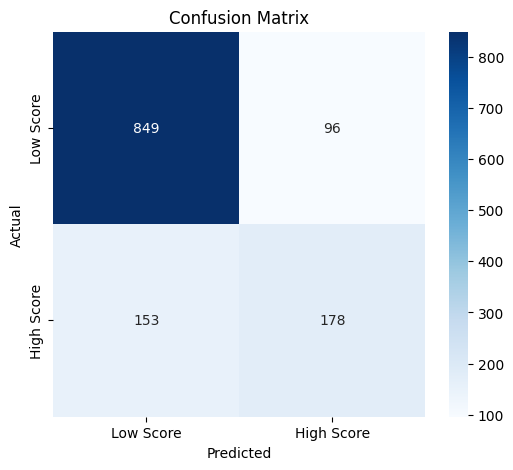

In [93]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Low Score', 'High Score'], yticklabels=['Low Score', 'High Score'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Feature Importance

To find the importance of these features, means that we find the coefficients value in the Logistic Regression Model. Then we will sort these values to see which features contributes most to the model.

In [94]:
# Display the coefficients of the Logistic Regression model
feature_importance = model.coef_[0]
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


,Feature,Importance
2,Parental_Involvement,0.636026
5,Motivation_Level,0.326152
1,Parental_Education_Level,0.317578
0,Family_Income,0.301288
4,Extracurricular_Activities,0.300202
3,Attendance,0.144574


We could see that the **family background (income, parental education, parental involvement)** total features are more important than the **student behavior (attendance, extracurricular activities, motivation level)** features. This could likely explain that the Family Background alone is always more important and affect more in **Exam High Score**, especially with the **Parental Involvement**. Although we think that **Attendance** is the most important features if we look at the big Heatmap plot above, but I think it only affect when we predict the exact score, as it's only accurate when we want to get the exact score of the student, but when we want to predict whether the score will be high or not, the **Attendace** will not that affective because if you attend enough class, it just ensure your score will pass the class, but not getting the highest.

### 9. Are there any students who perform exceptionally well or poorly compared ?

**Purpose**: Identify outliers in the dataset based on student performance.

**Steps**:
* **Calculate IQR (Interquartile Range)**: 
    - Compute the 25th percentile (Q1) and 75th percentile (Q3) of Exam_Score.
    - Calculate IQR = Q3 - Q1.
* **Determine Boundaries for Outliers**:
    - Lower bound = Q1 - 1.5 * IQR.
    - Upper bound = Q3 + 1.5 * IQR. 
* **Filter Students**:
    - Identify exceptional students with Exam_Score > upper_bound.
    - Identify poorly performing students with Exam_Score < lower_bound.
* **Analyze Data for Subgroups**: Compare the subgroup statistics with the general dataset to highlight differences.
* **Key Findings**: 
    - Exceptional students have higher averages in study-related metrics (e.g., Hours_Studied, Attendance) but lower in Sleep_Hours and Physical_Activity.
    - Poorly performing students show significantly lower averages in the same study-related metrics but with larger discrepancies.

In [95]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

exceptional = df[(df['Exam_Score'] > upper_bound)]
poor = df[(df['Exam_Score'] < lower_bound)]

In [96]:
exceptional.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Attendance_x_Parental_Involvement,Attendance_x_Parental_Education_Level,Parental_Involvement_x_Parental_Education_Level,PA_x_Sleep,PA_x_Motivation
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,23.947368,84.434211,1.302632,1.236842,0.671053,6.921053,76.171053,1.052632,0.907895,1.907895,...,0.144737,0.750000,0.473684,0.473684,84.921053,111.500000,63.578947,0.907895,19.421053,2.894737
std,8.567994,12.278258,0.748683,0.709336,0.472953,1.421390,15.988653,0.709831,0.291096,1.642580,...,0.354173,0.802081,0.682616,0.502625,8.077563,68.572395,70.001193,1.287661,8.745686,2.318499
min,1.000000,61.000000,0.000000,0.000000,0.000000,4.000000,52.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,73.750000,1.000000,1.000000,0.000000,6.000000,59.750000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,77.000000,69.750000,0.000000,0.000000,13.500000,1.000000
50%,24.500000,88.500000,1.000000,1.000000,1.000000,7.000000,76.500000,1.000000,1.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,83.500000,98.500000,69.500000,0.000000,18.000000,3.000000
75%,30.000000,96.000000,2.000000,2.000000,1.000000,8.000000,91.000000,2.000000,1.000000,2.250000,...,0.000000,1.000000,1.000000,1.000000,92.250000,181.000000,97.000000,2.000000,25.000000,4.000000
max,43.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.000000,6.000000,...,1.000000,2.000000,2.000000,1.000000,101.000000,200.000000,200.000000,4.000000,45.000000,8.000000


In [97]:
poor.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Attendance_x_Parental_Involvement,Attendance_x_Parental_Education_Level,Parental_Involvement_x_Parental_Education_Level,PA_x_Sleep,PA_x_Motivation
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,8.370370,64.185185,0.888889,0.777778,0.555556,7.111111,67.370370,0.629630,0.851852,0.518519,...,0.296296,0.629630,0.962963,0.444444,57.666667,56.296296,40.666667,0.407407,15.777778,1.518519
std,4.583819,4.657806,0.640513,0.751068,0.506370,1.281025,11.122217,0.791695,0.362014,0.700020,...,0.465322,0.791695,0.807726,0.506370,0.733799,40.206979,51.373444,0.747265,7.329253,2.137043
min,2.000000,60.000000,0.000000,0.000000,0.000000,5.000000,51.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,61.000000,0.500000,0.000000,0.000000,6.000000,60.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,58.000000,30.000000,0.000000,0.000000,12.000000,0.000000
50%,9.000000,63.000000,1.000000,1.000000,1.000000,7.000000,67.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,58.000000,62.000000,0.000000,0.000000,14.000000,0.000000
75%,12.500000,66.500000,1.000000,1.000000,1.000000,8.000000,72.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,58.000000,68.000000,66.500000,0.500000,20.000000,2.000000
max,17.000000,79.000000,2.000000,2.000000,1.000000,10.000000,93.000000,2.000000,1.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,58.000000,132.000000,158.000000,2.000000,30.000000,8.000000


In [98]:
general_desc = df.describe()
exceptional_desc = exceptional.describe()
difference_desc = exceptional_desc.subtract(general_desc)
difference_desc

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Attendance_x_Parental_Involvement,Attendance_x_Parental_Education_Level,Parental_Involvement_x_Parental_Education_Level,PA_x_Sleep,PA_x_Motivation
count,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,...,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000,-6302.000000
mean,3.970260,4.413358,0.217182,0.138692,0.074157,-0.113911,1.104888,0.144667,-0.016063,0.412598,...,0.040002,0.044606,-0.030079,0.051922,17.668936,24.708059,6.894720,0.146214,-1.487539,0.203611
std,2.582535,0.727535,0.053663,0.010701,-0.017607,-0.046642,1.588264,0.014072,0.026009,0.408597,...,0.047937,0.021511,0.012175,0.008745,4.163346,11.017876,6.036429,0.173244,0.170019,-0.060039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,0.000000,0.000000,0.000000,0.000000,-3.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,5.750000,0.000000,0.000000,-1.500000,1.000000
50%,4.500000,8.500000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,16.500000,15.500000,8.500000,0.000000,-3.000000,0.000000
75%,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,23.250000,51.000000,3.000000,1.000000,-2.000000,0.000000
max,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-4.000000


In [99]:
poor_desc = poor.describe()
difference_desc = poor_desc.subtract(general_desc)
difference_desc

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Attendance_x_Parental_Involvement,Attendance_x_Parental_Education_Level,Parental_Involvement_x_Parental_Education_Level,PA_x_Sleep,PA_x_Motivation
count,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.00000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,...,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000,-6351.000000
mean,-11.606738,-15.835668,-0.196561,-0.320372,-0.04134,0.076147,-7.695795,-0.278335,-0.072106,-0.976778,...,0.191561,-0.075764,0.459200,0.022682,-9.585450,-30.495645,-16.017560,-0.354273,-5.130814,-1.172607
std,-1.401641,-6.892917,-0.054508,0.052432,0.01581,-0.187008,-3.278172,0.095937,0.096927,-0.533963,...,0.159086,0.011125,0.137285,0.012490,-3.180417,-17.347540,-12.591319,-0.367152,-1.246414,-0.241495
min,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-12.000000,-9.000000,-0.500000,-1.000000,0.00000,0.000000,-2.500000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,-7.000000,-34.000000,0.000000,0.000000,-3.000000,0.000000
50%,-11.000000,-17.000000,0.000000,0.000000,0.00000,0.000000,-8.000000,-1.000000,0.000000,-1.000000,...,0.000000,-1.000000,1.000000,0.000000,-9.000000,-21.000000,-61.000000,0.000000,-7.000000,-3.000000
75%,-11.500000,-23.500000,-1.000000,-1.000000,0.00000,0.000000,-16.000000,0.000000,0.000000,-1.000000,...,1.000000,0.000000,1.000000,0.000000,-11.000000,-62.000000,-27.500000,-0.500000,-7.000000,-2.000000
max,-27.000000,-21.000000,0.000000,0.000000,0.00000,0.000000,-7.000000,0.000000,0.000000,-6.000000,...,0.000000,0.000000,0.000000,0.000000,-43.000000,-68.000000,-42.000000,-2.000000,-30.000000,-4.000000


Two interesting findings from these tables:
- The exceptional students had higher than average Hours_Studied, Attendance, and Tutoring_Sessions as expected (+3.9, +4.4, and +.4 respectively), but they also had lower than average Sleep_Hours and Physical_Activity (-0.11 and -0.15).
- The poorly performing students also had lower averages in many of the same categories (Hours_Studied, Attendance, and Tutoring_Sessions), but at much larger discrepancies compared to their exceptional counterpars t(-11.8, -15.9, -.89).


### 10. Does higher motivation predict future success even for students with lower past scores? to their peers?

1. Define Success and Peer Groups:
    - Create a Success column (`Exam_Score` >= 80).
    - Define "low past scores" (e.g., `Previous_Scores` < threshold) and group students by this.
2. Group by Motivation Levels:
    - Categorize Motivation_Level (e.g., "Low," "Medium," "High") and compare success rates within each level for students with low past scores.
3. Comparison Against Peers:
    - For each motivation level, calculate success rates for both low and high past score groups.
    - Compare how motivation impacts these groups differently.
4. Statistical Testing:
    - Use chi-square or logistic regression to assess the significance of motivation in predicting success.
5. Visualization:
    - Use bar plots or heatmaps to visualize success rates for different combinations of `Motivation_Level` and `Previous_Scores`.

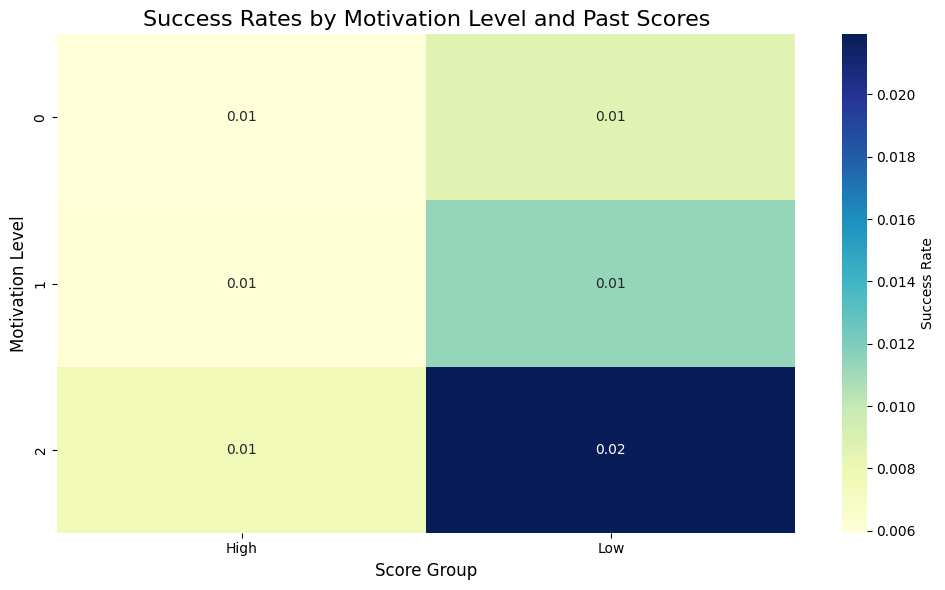

            Feature  Coefficient
0  Motivation_Level     0.226544
1       Score_Group     0.961932
2   Previous_Scores     0.014141


In [100]:
success_df = df.copy()
success_df['Success'] = (success_df['Exam_Score'] >= 80).astype(int)
low_score_threshold = 60  # Define low past score threshold
success_df['Score_Group'] = success_df['Previous_Scores'].apply(lambda x: 'Low' if x < low_score_threshold else 'High')

grouped = success_df.groupby(['Motivation_Level', 'Score_Group'])['Success'].mean().reset_index()

pivot = grouped.pivot(index='Motivation_Level', columns='Score_Group', values='Success')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Success Rate'})
plt.title('Success Rates by Motivation Level and Past Scores', fontsize=16)
plt.xlabel('Score Group', fontsize=12)
plt.ylabel('Motivation Level', fontsize=12)
plt.tight_layout()
plt.show()

success_df['Motivation_Level'] = LabelEncoder().fit_transform(success_df['Motivation_Level'])
success_df['Score_Group'] = LabelEncoder().fit_transform(success_df['Score_Group'])

X = success_df[['Motivation_Level', 'Score_Group', 'Previous_Scores']]
y = success_df['Success']

model = LogisticRegression()
model.fit(X, y)

coefficients = pd.DataFrame({
    'Feature': ['Motivation_Level', 'Score_Group', 'Previous_Scores'],
    'Coefficient': model.coef_[0]
})
print(coefficients)

**Observations:**
1. Success Rates:
    - For students with low past scores, the success rates are generally very low (e.g., 0.01 or 0.02).
    - For students with high past scores, success rates are slightly better but still low across all motivation levels.
2. Motivation's Role:
    - Success rates remain almost constant across all motivation levels (0, 1, 2), suggesting motivation alone does not significantly influence success.
    - For students with low past scores, higher motivation (level 2) seems to slightly improve success rates.
3. Score Group Impact:
    - Low Score Group generally has worse success rates compared to the High Score Group.


**Key Insights:**
- The data indicates that past performance (Score Group) has a stronger correlation with success than motivation level.
- Even high motivation (level 2) has limited impact on improving success rates, particularly for students with low past scores.


This analysis suggests that interventions beyond just motivation may be needed to help students with lower past scores succeed.